In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()


['images', 'data', 'target_names', 'DESCR', 'target']

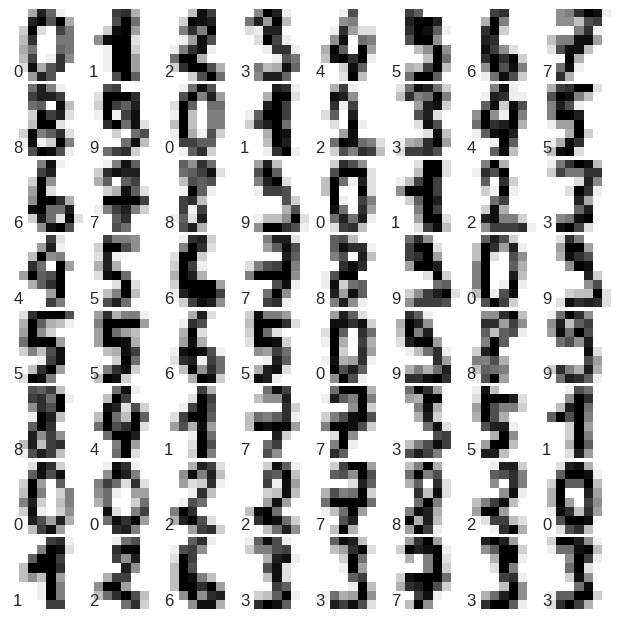

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
XTrain, XTest, yTrain, yTest = train_test_split(digits.data, digits.target, test_size = 0.33)
model = RandomForestClassifier(n_estimators = 1000)
model.fit(XTrain, yTrain)
ypred = model.predict(XTest)

In [17]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, digits.data, digits.target, cv = 3)

array([ 0.94186047,  0.95826377,  0.92449664])

In [18]:
from sklearn.grid_search import GridSearchCV

param_grid = {'n_estimators':[10, 100, 1000]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 4)

/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
grid.fit(digits.data, digits.target)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [20]:
grid.best_params_

{'n_estimators': 1000}

In [21]:
model = grid.best_estimator_
model.fit(XTrain, yTrain)
ypred = model.predict(XTest)



In [22]:
from sklearn import metrics
print (metrics.classification_report(ypred, yTest))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        56
          1       1.00      0.97      0.98        67
          2       1.00      0.98      0.99        50
          3       0.98      1.00      0.99        58
          4       0.95      0.98      0.96        55
          5       0.97      0.97      0.97        64
          6       0.98      1.00      0.99        53
          7       1.00      0.99      0.99        73
          8       0.96      0.95      0.95        56
          9       0.95      0.97      0.96        62

avg / total       0.98      0.98      0.98       594

